In [89]:
import pandas as pd

In [90]:
import matplotlib.pyplot as plt

In [91]:
import seaborn as sns

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [93]:
data = pd.read_csv(r'C:\Users\CHETAN\Desktop\\weather1.csv')


In [169]:
data

,date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RISK_MM,RainTomorrow,Month,AvgHumidity,AvgPressure,AvgCloud,AvgTemp,AvgWindSpeed,RainfallTomorrow
0,2012-01-01,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,No,3.6,Yes,1.0,48.5,1017.35,7.0,19.00,13.0,3.6
1,2012-01-02,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,Yes,3.6,Yes,1.0,58.0,1010.40,4.0,21.60,10.5,3.6
2,2012-01-03,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,Yes,39.8,Yes,1.0,75.5,1008.35,7.5,17.80,6.0,39.8
3,2012-01-04,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,Yes,2.8,Yes,1.0,59.0,1006.25,4.5,13.80,27.0,39.8
4,2012-01-05,7.6,16.1,39.8,5.6,10.6,SSE,50.0,SSE,ESE,Yes,0.0,No,1.0,58.5,1018.40,7.0,13.25,24.0,39.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2012-12-25,3.3,25.5,39.8,5.2,10.8,N,43.0,N,NNW,No,0.0,No,12.0,36.5,1016.70,1.5,18.40,11.5,39.8
361,2012-12-27,9.0,30.7,39.8,7.6,12.1,NNW,76.0,SSE,NW,No,0.0,No,12.0,26.5,1013.45,2.0,25.20,28.5,39.8
362,2012-12-28,7.1,28.4,39.8,11.6,12.7,N,48.0,NNW,NNW,No,0.0,No,12.0,33.5,1018.45,0.5,22.70,10.5,39.8
363,2012-12-29,12.5,19.9,39.8,8.4,5.3,ESE,43.0,ENE,ENE,No,0.0,No,12.0,55.0,1023.40,2.5,16.40,10.0,39.8


In [95]:
print(data.head())

       date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0  1/1/2012      8.0     24.3       0.0          3.4       6.3          NW   
1  1/2/2012     14.0     26.9       3.6          4.4       9.7         ENE   
2  1/3/2012     13.7     23.4       3.6          5.8       3.3          NW   
3  1/4/2012     13.3     15.5      39.8          7.2       9.1          NW   
4  1/5/2012      7.6     16.1      39.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  ...  Humidity3pm  Pressure9am  \
0           30.0         SW         NW  ...         29.0       1019.7   
1           39.0          E          W  ...         36.0       1012.4   
2           85.0          N        NNE  ...         69.0       1009.5   
3           54.0        WNW          W  ...         56.0       1005.5   
4           50.0        SSE        ESE  ...         49.0       1018.3   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1015.0  

In [96]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           366 non-null    object 
 1   MinTemp        366 non-null    float64
 2   MaxTemp        366 non-null    float64
 3   Rainfall       366 non-null    float64
 4   Evaporation    366 non-null    float64
 5   Sunshine       363 non-null    float64
 6   WindGustDir    363 non-null    object 
 7   WindGustSpeed  364 non-null    float64
 8   WindDir9am     335 non-null    object 
 9   WindDir3pm     365 non-null    object 
 10  WindSpeed9am   359 non-null    float64
 11  WindSpeed3pm   366 non-null    float64
 12  Humidity9am    366 non-null    float64
 13  Humidity3pm    366 non-null    float64
 14  Pressure9am    366 non-null    float64
 15  Pressure3pm    366 non-null    float64
 16  Cloud9am       366 non-null    float64
 17  Cloud3pm       366 non-null    float64
 18  Temp9am 

In [97]:
print(data.describe())

          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273   39.493443     4.521858    7.909366   
std      6.025800    6.690516    3.380251     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000   39.800000     2.200000    5.950000   
50%      7.450000   19.650000   39.800000     4.200000    8.600000   
75%     12.500000   25.500000   39.800000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.00

C:\Users\CHETAN\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CHETAN\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CHETAN\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


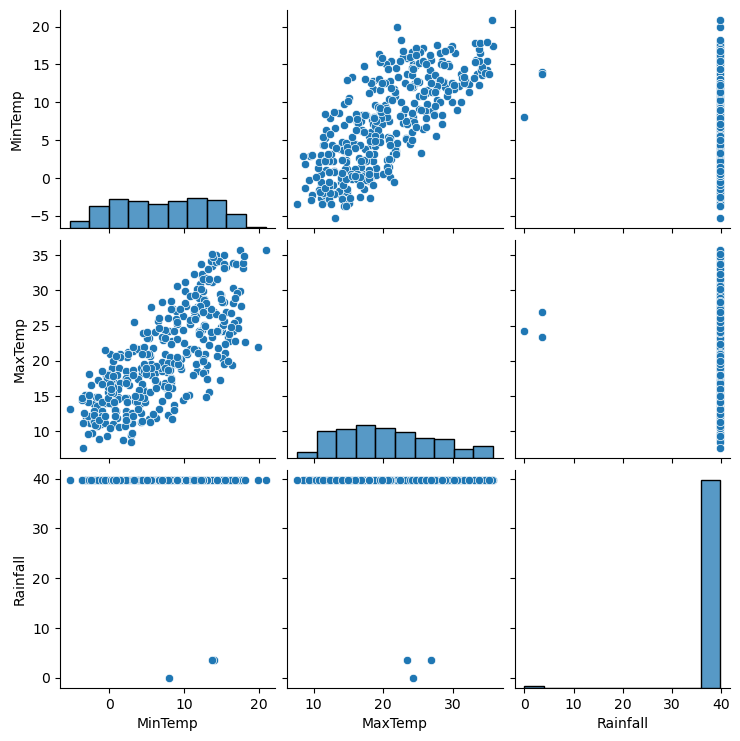

In [98]:
sns.pairplot(data[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.show()


In [99]:
data['date'] = pd.to_datetime(data['date'])

In [100]:
print(data['date'])

0      2012-01-01
1      2012-01-02
2      2012-01-03
3      2012-01-04
4      2012-01-05
          ...    
1456          NaT
1457          NaT
1458          NaT
1459          NaT
1460          NaT
Name: date, Length: 1461, dtype: datetime64[ns]


In [101]:
data['Month'] = data['date'].dt.month

In [102]:
print(data['Month'])

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1456    NaN
1457    NaN
1458    NaN
1459    NaN
1460    NaN
Name: Month, Length: 1461, dtype: float64


In [103]:
monthly_avg_max_temp = data.groupby('Month')['MaxTemp'].mean()

In [104]:
print(monthly_avg_max_temp )

Month
1.0     24.903226
2.0     24.993103
3.0     29.309677
4.0     24.680000
5.0     25.987097
6.0     19.500000
7.0     17.232258
8.0     14.445161
9.0     11.690000
10.0    12.841935
11.0    18.013333
12.0    23.025806
Name: MaxTemp, dtype: float64


In [105]:
monthly_total_rainfall = data.groupby('Month')['Rainfall'].sum()

In [106]:
print(monthly_total_rainfall )

Month
1.0     1121.6
2.0     1154.2
3.0     1233.8
4.0     1194.0
5.0     1233.8
6.0     1194.0
7.0     1233.8
8.0     1233.8
9.0     1194.0
10.0    1233.8
11.0    1194.0
12.0    1233.8
Name: Rainfall, dtype: float64


In [107]:
monthly_avg_rainfall = data.groupby('Month')['Rainfall'].mean()

In [108]:
print(monthly_avg_rainfall)

Month
1.0     36.180645
2.0     39.800000
3.0     39.800000
4.0     39.800000
5.0     39.800000
6.0     39.800000
7.0     39.800000
8.0     39.800000
9.0     39.800000
10.0    39.800000
11.0    39.800000
12.0    39.800000
Name: Rainfall, dtype: float64


In [109]:
monthly_avg_sunshine = data.groupby('Month')['Sunshine'].mean()
data['AvgHumidity'] = (data['Humidity9am'] + data['Humidity3pm']) / 2
data['AvgPressure'] = (data['Pressure9am'] + data['Pressure3pm']) / 2
data['AvgCloud'] = (data['Cloud9am'] + data['Cloud3pm']) / 2
data['AvgTemp'] = (data['Temp9am'] + data['Temp3pm']) / 2
data['AvgWindSpeed'] = (data['WindSpeed9am'] + data['WindSpeed3pm']) / 2

In [110]:
print(monthly_avg_sunshine)

Month
1.0     7.632258
2.0     8.382759
3.0     9.441935
4.0     8.080000
5.0     8.970968
6.0     8.023333
7.0     7.480645
8.0     5.206667
9.0     5.906667
10.0    7.170000
11.0    8.676667
12.0    9.893333
Name: Sunshine, dtype: float64


In [111]:
data.describe()

,date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Month,AvgHumidity,AvgPressure,AvgCloud,AvgTemp,AvgWindSpeed
count,366,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,359.000000
mean,2012-07-01 12:00:00,7.265574,20.550273,39.493443,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,...,4.024590,12.358470,19.230874,1.428415,6.513661,58.277322,1018.259699,3.957650,15.794672,13.837047
min,2012-01-01 00:00:00,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,...,0.000000,0.100000,5.100000,0.000000,1.000000,26.500000,996.650000,0.000000,4.200000,1.000000
25%,2012-04-01 06:00:00,2.300000,15.025000,39.800000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,...,1.000000,7.625000,14.150000,0.000000,4.000000,50.000000,1014.100000,1.500000,10.950000,8.500000
50%,2012-07-01 12:00:00,7.450000,19.650000,39.800000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,...,4.000000,12.550000,18.550000,0.000000,7.000000,58.000000,1018.475000,4.000000,15.450000,12.500000
75%,2012-09-30 18:00:00,12.500000,25.500000,39.800000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,...,7.000000,17.000000,24.000000,0.200000,9.750000,65.875000,1022.937500,6.500000,20.300000,17.750000
max,2012-12-31 00:00:00,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,...,8.000000,24.700000,34.500000,39.800000,12.000000,97.500000,1033.800000,8.000000,29.600000,41.500000
std,NaN,6.025800,6.690516,3.380251,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,...,2.666268,5.630832,6.640346,4.225800,3.455958,13.215454,6.524823,2.455965,5.893774,7.205429


In [112]:
data.drop(['Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'WindSpeed9am', 'WindSpeed3pm'], axis=1, inplace=True)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 0 to 365
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           328 non-null    datetime64[ns]
 1   MinTemp        328 non-null    float64       
 2   MaxTemp        328 non-null    float64       
 3   Rainfall       328 non-null    float64       
 4   Evaporation    328 non-null    float64       
 5   Sunshine       328 non-null    float64       
 6   WindGustDir    328 non-null    object        
 7   WindGustSpeed  328 non-null    float64       
 8   WindDir9am     328 non-null    object        
 9   WindDir3pm     328 non-null    object        
 10  RainToday      328 non-null    object        
 11  RISK_MM        328 non-null    float64       
 12  RainTomorrow   328 non-null    object        
 13  Month          328 non-null    float64       
 14  AvgHumidity    328 non-null    float64       
 15  AvgPressure    328 non-null 

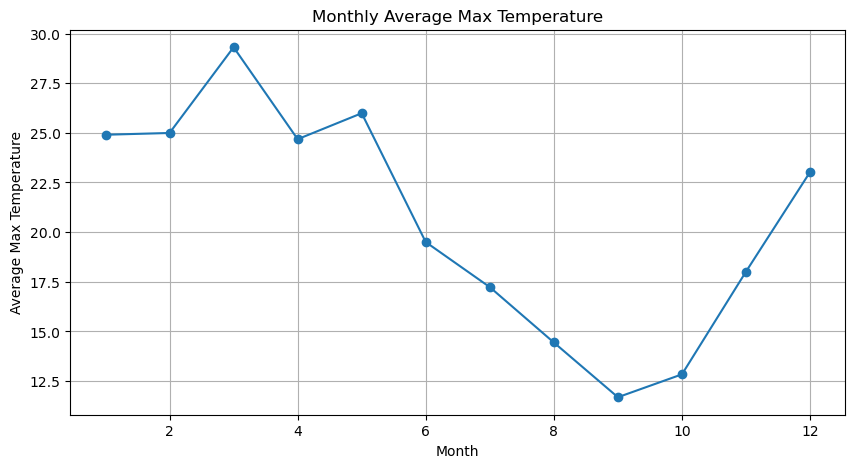

In [143]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_max_temp.index, monthly_avg_max_temp.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Max Temperature')
plt.title('Monthly Average Max Temperature')
plt.grid(True)
plt.show()

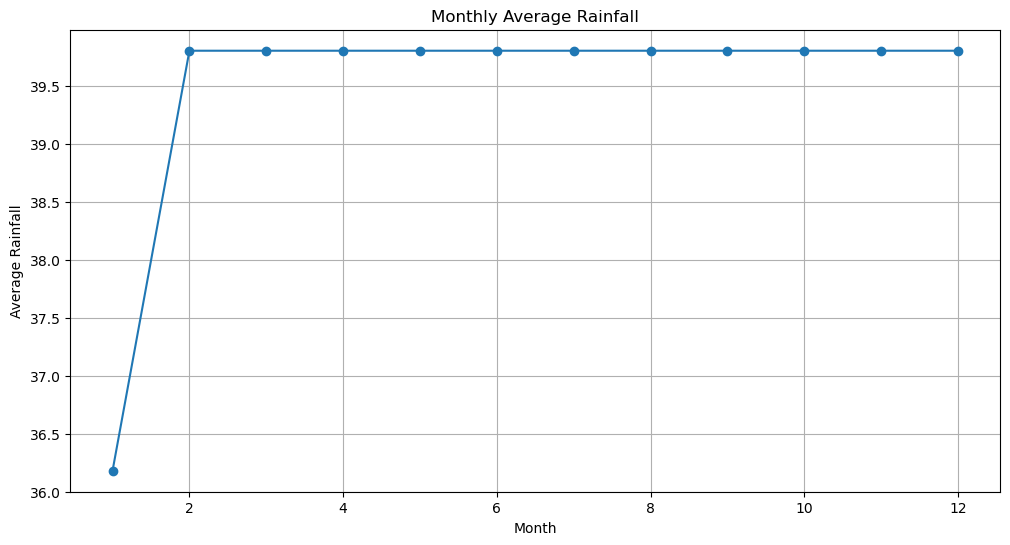

In [144]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_rainfall.index, monthly_avg_rainfall.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Rainfall')
plt.title('Monthly Average Rainfall')
plt.grid(True)
plt.show()

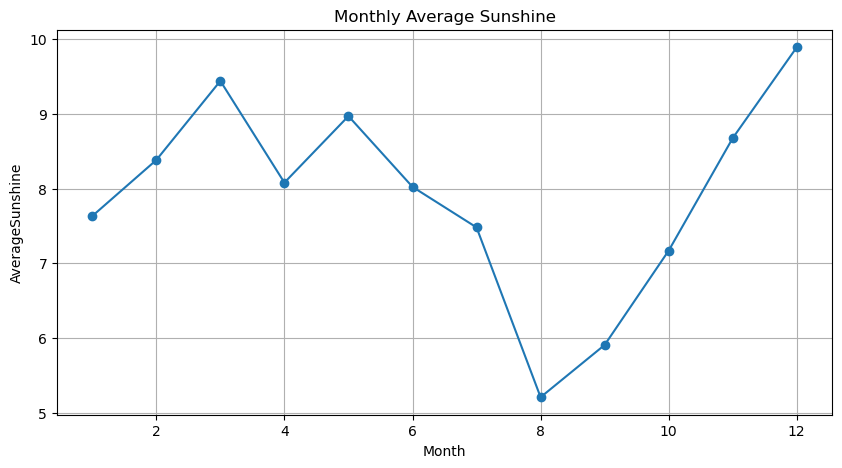

In [145]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_sunshine.index, monthly_avg_sunshine.values, marker='o')
plt.xlabel('Month')
plt.ylabel('AverageSunshine')
plt.title('Monthly Average Sunshine')
plt.grid(True)
plt.show()

In [146]:
X = data[['AvgTemp']]
y = data['Rainfall']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [149]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')

Mean Squared Error for Rainfall Prediction: 0.24266444873839768


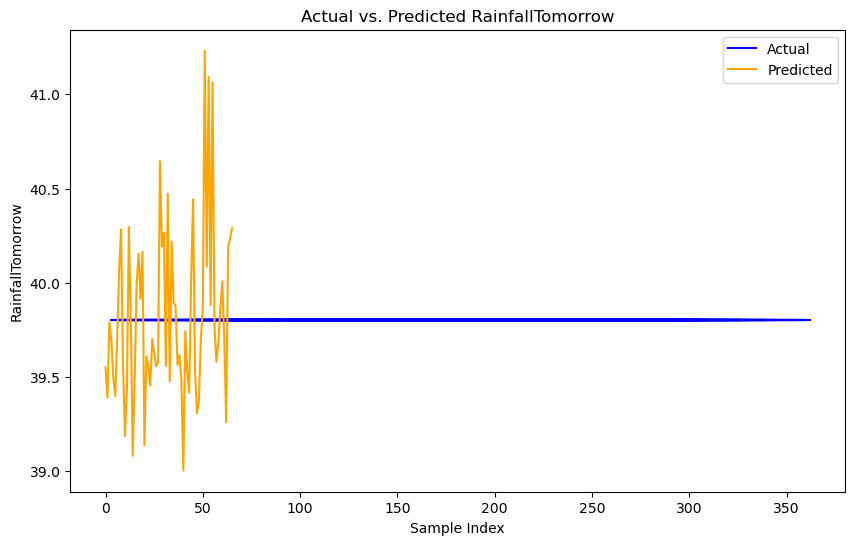

In [173]:

# Plot linear regression model
plt.figure(figsize=(10, 6))
plt.plot(y_test, color='blue', label='Actual')  # Actual values in blue
plt.plot(y_pred, color='orange', label='Predicted')  # Predicted values in orange
plt.xlabel('Sample Index')
plt.ylabel('RainfallTomorrow')
plt.title('Actual vs. Predicted RainfallTomorrow')
plt.legend()
plt.show()
